In [1]:
import pickle
import os
from rulu.covariance_CI_test import *
from rulu.utils import find_all_tests_in_same_category
from matplotlib import pyplot as plt
# from scipy.stats import percentileofscore

/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
cov_Yr_Ys_tests = find_all_tests_in_same_category(
    CovYrYsCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Ys_second_order_tests = find_all_tests_in_same_category(
    CovYrYsSecondOrderCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_tests = find_all_tests_in_same_category(
    CovYrZsCITest(), in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_second_order_tests = find_all_tests_in_same_category(
    CovYrZsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_tests = find_all_tests_in_same_category(
    CovXIrXJsCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_second_order_tests = find_all_tests_in_same_category(
    CovXIrXJsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")


In [3]:
for test_collection in [cov_Yr_Ys_tests, cov_Yr_Ys_second_order_tests,
                        cov_Yr_Zs_tests, cov_Yr_Zs_second_order_tests, 
                        cov_XIr_XJs_tests, cov_XIr_XJs_second_order_tests]:
    print_test_collection_result(test_collection)

Cov(Y_(r), Y_(s)): 4688/4940 (94.9%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Y_(s)) - 2nd order: 4940/4940 (100.0%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)): 4663/4940 (94.39%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)) - 2nd order: 4739/4940 (95.93%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)): 4445/4940 (89.98%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)) - 2nd order: 4495/4940 (90.99%) of the tests have the theoretical quantity within the CI.


In [4]:
for test_collection in [cov_Yr_Ys_tests, cov_Yr_Ys_second_order_tests,
                        cov_Yr_Zs_tests, cov_Yr_Zs_second_order_tests, 
                        cov_XIr_XJs_tests, cov_XIr_XJs_second_order_tests]:
    print_test_collection_result(test_collection)

Cov(Y_(r), Y_(s)): 4688/4940 (94.9%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Y_(s)) - 2nd order: 4940/4940 (100.0%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)): 4663/4940 (94.39%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)) - 2nd order: 4739/4940 (95.93%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)): 4445/4940 (89.98%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)) - 2nd order: 4495/4940 (90.99%) of the tests have the theoretical quantity within the CI.


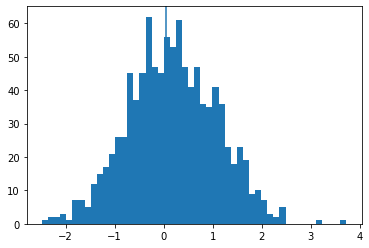

In [5]:
test = cov_XIr_XJs_second_order_tests[123]

plt.figure()
plt.hist(test.samples, bins=50)
plt.axvline(test.theoretical_quantity())
plt.show()

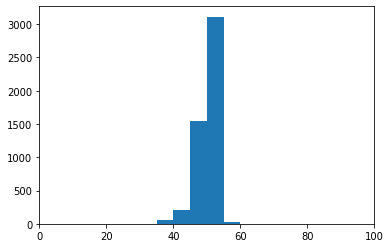

In [6]:
test_collection = cov_Yr_Ys_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 105, 5))
plt.xlim(0, 100)
plt.show()

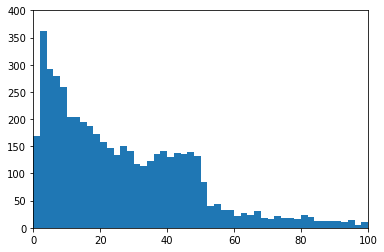

In [7]:
test_collection = cov_Yr_Zs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

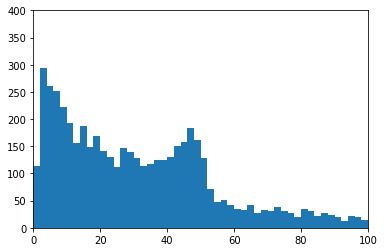

In [8]:
test_collection = cov_Yr_Zs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

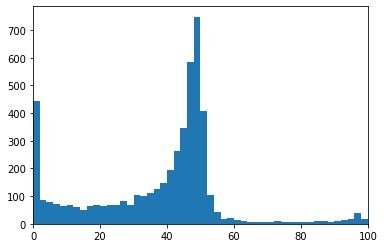

In [9]:
test_collection = cov_XIr_XJs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.show()

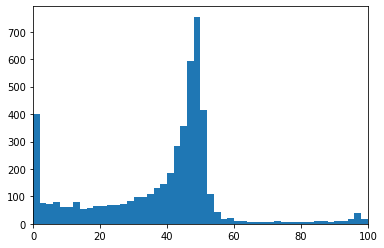

In [10]:
test_collection = cov_XIr_XJs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.show()

In [13]:
for test in cov_XIr_XJs_second_order_tests:
    if test.theoretical_quantity_below_sample_CI():
        print(test.N, test.r, test.s,  "    \t",
              np.round(test.sigma_sq_X, 3), 
              np.round(test.sigma_sq_1, 3), np.round(test.sigma_sq_2, 3), "\t",
              np.round(test.theoretical_quantity(), 3),
              np.round(test.sample_CI(), 3), "\t",
              np.round(test.sample_CI() / test.theoretical_quantity(), 4)
             )

15 15 15     	 97.573 0.385 0.297 	 10.26 [23.929 35.769] 	 [2.3323 3.4862]
52 51 51     	 31.526 5.911 3.559 	 2.314 [2.731 5.231] 	 [1.18   2.2605]
56 55 53     	 83.327 50.616 0.941 	 2.155 [3.194 7.677] 	 [1.4818 3.5617]
23 22 20     	 22.188 8.516 0.92 	 0.981 [1.232 2.727] 	 [1.2551 2.7791]
356 356 355     	 89.255 14.652 1.875 	 3.526 [4.716 9.243] 	 [1.3375 2.6214]
14 14 13     	 93.714 5.613 0.182 	 8.746 [10.419 18.561] 	 [1.1913 2.1223]
10 9 9     	 80.74 56.31 0.989 	 6.277 [11.263 20.476] 	 [1.7944 3.2623]
12 12 12     	 37.974 15.314 1.428 	 3.649 [10.054 16.519] 	 [2.755  4.5267]
23 22 23     	 20.129 7.228 1.53 	 1.361 [1.885 4.085] 	 [1.3855 3.002 ]
25 25 25     	 61.666 6.995 2.037 	 6.009 [13.648 21.256] 	 [2.2714 3.5376]
31 30 31     	 22.377 9.519 3.424 	 1.582 [1.915 4.379] 	 [1.2105 2.7679]
17 12 15     	 58.611 26.563 0.854 	 2.15 [2.484 6.414] 	 [1.1551 2.9829]
30 29 29     	 4.948 1.331 0.866 	 0.388 [0.49  0.982] 	 [1.2622 2.5315]
10 10 9     	 36.676 1.313 0

19 16 14     	 14.713 17.929 0.337 	 0.319 [0.528 1.689] 	 [1.6543 5.2919]
19 17 16     	 43.127 29.796 2.281 	 1.772 [2.496 6.089] 	 [1.408  3.4353]
15 14 15     	 69.557 15.81 4.576 	 5.641 [ 7.112 14.95 ] 	 [1.2608 2.65  ]
12 10 10     	 87.602 98.953 51.554 	 4.164 [ 5.422 19.076] 	 [1.3022 4.5817]
18 9 9     	 65.948 19.504 0.746 	 3.483 [3.612 7.   ] 	 [1.0371 2.0099]
15 15 14     	 9.497 2.365 0.35 	 0.724 [1.084 1.993] 	 [1.4974 2.7536]
24 24 24     	 88.613 74.4 28.349 	 10.909 [16.979 32.44 ] 	 [1.5564 2.9737]
12 12 11     	 27.956 47.831 2.279 	 1.283 [3.043 6.87 ] 	 [2.3723 5.3563]
22 22 22     	 9.93 7.923 2.766 	 1.196 [1.892 3.712] 	 [1.5815 3.103 ]
10 10 10     	 10.352 6.27 0.279 	 0.866 [2.837 4.681] 	 [3.2741 5.4023]
13 7 7     	 98.247 5.868 0.298 	 8.907 [ 9.263 14.478] 	 [1.0399 1.6254]
12 11 11     	 36.84 13.375 0.603 	 3.569 [5.527 9.032] 	 [1.5486 2.5307]
10 8 8     	 15.753 0.244 0.167 	 2.058 [2.333 3.406] 	 [1.1339 1.6555]
11 9 11     	 27.331 79.216 1.327 

10 10 10     	 41.952 89.889 13.424 	 5.104 [ 8.179 17.595] 	 [1.6026 3.4477]
30 30 30     	 11.429 6.618 0.385 	 0.824 [2.139 3.838] 	 [2.596  4.6575]
16 16 16     	 47.266 49.051 41.179 	 7.685 [ 8.069 18.865] 	 [1.05   2.4549]
35 35 35     	 58.756 14.332 2.749 	 5.282 [12.029 19.803] 	 [2.2772 3.7489]
10 9 10     	 6.948 9.367 0.141 	 0.251 [0.767 1.818] 	 [3.0577 7.2512]
14 13 14     	 48.711 10.892 0.15 	 3.617 [ 5.296 10.247] 	 [1.4643 2.8333]
209 209 208     	 90.313 7.036 5.5 	 4.558 [5.113 9.935] 	 [1.1218 2.1796]
17 8 9     	 74.383 39.635 7.314 	 2.928 [3.107 8.859] 	 [1.061  3.0257]
186 186 186     	 34.321 4.604 0.056 	 1.958 [4.658 7.789] 	 [2.3787 3.9775]
10 10 10     	 1.271 2.446 0.316 	 0.14 [0.273 0.547] 	 [1.9481 3.9067]
10 10 10     	 49.921 3.861 0.054 	 5.504 [14.383 21.698] 	 [2.6134 3.9424]
33 31 31     	 55.497 0.518 0.28 	 4.35 [4.506 6.988] 	 [1.0357 1.6062]
17 14 13     	 53.437 56.325 7.125 	 1.701 [2.176 7.365] 	 [1.2791 4.33  ]
10 10 9     	 72.195 40.6

31 31 31     	 31.973 0.755 0.717 	 2.917 [ 6.486 10.076] 	 [2.2233 3.4537]
64 62 60     	 41.231 13.922 0.332 	 1.197 [1.297 3.141] 	 [1.084  2.6254]
10 10 10     	 69.705 15.016 3.683 	 8.146 [20.402 31.974] 	 [2.5046 3.9253]
11 11 11     	 69.516 35.071 5.502 	 7.299 [19.332 31.656] 	 [2.6485 4.337 ]
21 21 21     	 5.242 43.753 0.47 	 0.181 [0.279 1.179] 	 [1.5424 6.5282]
17 15 15     	 10.677 0.147 0.04 	 1.09 [1.184 1.758] 	 [1.0863 1.6132]
16 12 13     	 41.932 35.672 2.641 	 1.523 [2.189 5.863] 	 [1.4371 3.8497]
48 48 46     	 78.897 14.862 0.892 	 3.444 [3.752 8.091] 	 [1.0895 2.3495]
11 11 11     	 65.946 22.377 5.564 	 7.592 [19.167 30.068] 	 [2.5246 3.9604]
33 29 30     	 50.23 7.196 0.788 	 2.483 [2.607 4.768] 	 [1.0497 1.92  ]
10 8 9     	 0.479 0.467 0.229 	 0.028 [0.039 0.114] 	 [1.4072 4.1242]
53 53 53     	 19.887 8.871 8.558 	 2.373 [3.132 6.522] 	 [1.3198 2.7482]
25 25 24     	 19.506 6.471 1.302 	 1.293 [1.881 3.695] 	 [1.4541 2.8566]
11 9 10     	 61.617 15.551 2.2